<a href="https://colab.research.google.com/github/ishwerdutt/pytorch/blob/main/Dataloaders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification
import torch

In [2]:
X, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42
)

In [3]:
X

array([[-0.99910178, -0.66386   ],
       [ 1.24668618,  1.15359685],
       [ 0.96277683,  0.85939747],
       ...,
       [-0.10126746, -1.59017563],
       [ 0.64376105, -0.78053855],
       [ 0.69852984, -1.27940455]])

In [4]:
y

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,

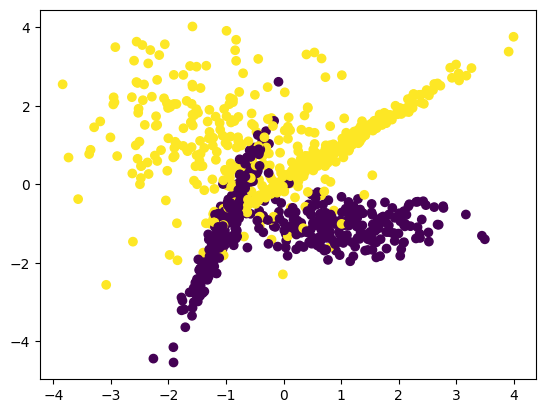

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Converting numpy arrays to tensors

In [10]:
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

<ipython-input-10-4f173c4a4219>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-10-4f173c4a4219>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


In [11]:
X

tensor([[-0.9991, -0.6639],
        [ 1.2467,  1.1536],
        [ 0.9628,  0.8594],
        ...,
        [-0.1013, -1.5902],
        [ 0.6438, -0.7805],
        [ 0.6985, -1.2794]])

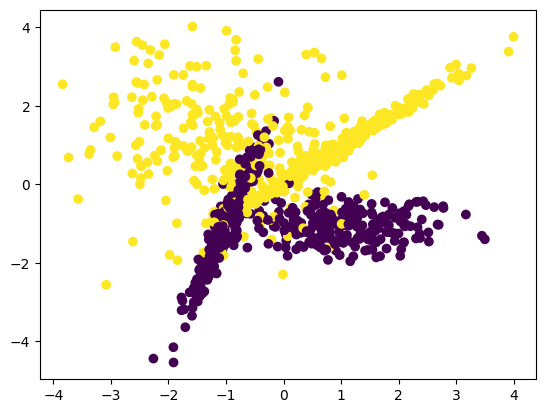

In [12]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [13]:
from torch.utils.data import Dataset, DataLoader

In [14]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    self.features = features
    self.labels = labels

  def __len__(self):
    return self.features.shape[0]


  ## we can do any kind of data transformation in __getitem__ method
  # resize
  # aug
  # black and white etc.

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [15]:
dataset = CustomDataset(X, y)

In [17]:
len(dataset)

1000

In [18]:
dataset[5]

(tensor([2.4855, 2.3996]), tensor(1.))

In [19]:
dataloader = DataLoader(dataset, batch_size = 4, shuffle = True)

In [27]:
for batch_features, batch_labels in dataloader:
  print("first batch randomly selected")
  print(batch_features)
  print(batch_labels)
  break

first batch randomly selected
tensor([[ 0.4003, -1.1959],
        [ 2.3932,  2.2804],
        [ 2.3297, -0.4450],
        [-0.4328,  0.8909]])
tensor([0., 1., 0., 0.])


## implementing minibatch GD

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


In [32]:
df = pd.read_csv("https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv")

In [33]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [35]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


from matplotlib import pyplot as plt
df['radius_mean'].plot(kind='hist', bins=20, title='radius_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['texture_mean'].plot(kind='hist', bins=20, title='texture_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['perimeter_mean'].plot(kind='hist', bins=20, title='perimeter_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['area_mean'].plot(kind='hist', bins=20, title='area_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('diagnosis').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='radius_mean', y='texture_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='texture_mean', y='perimeter_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='perimeter_mean', y='area_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='area_mean', y='smoothness_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['radius_mean'].plot(kind='line', figsize=(8, 4), title='radius_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['texture_mean'].plot(kind='line', figsize=(8, 4), title='texture_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['perimeter_mean'].plot(kind='line', figsize=(8, 4), title='perimeter_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['area_mean'].plot(kind='line', figsize=(8, 4), title='area_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='radius_mean', y='diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='texture_mean', y='diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='perimeter_mean', y='diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='area_mean', y='diagnosis', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
df.shape

(569, 31)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['diagnosis']), df['diagnosis'], test_size = 0.2, random_state = 42)

In [38]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.8850,17.67,0.009549,0.086060,0.303800,0.033220,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.4140,81.46,0.004253,0.047590,0.038720,0.015670,0.01798,0.005295,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,0.4098,2.2650,2.6080,23.52,0.008738,0.039380,0.043120,0.015600,0.04192,0.005822,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.4970,16.64,0.007189,0.010350,0.010810,0.006245,0.02158,0.002619,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.3120,34.62,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.1680,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,0.3060,1.6570,2.1550,20.62,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,0.2208,0.9533,1.6020,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


from matplotlib import pyplot as plt
_df_0['radius_mean'].plot(kind='hist', bins=20, title='radius_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['texture_mean'].plot(kind='hist', bins=20, title='texture_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['perimeter_mean'].plot(kind='hist', bins=20, title='perimeter_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['area_mean'].plot(kind='hist', bins=20, title='area_mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='radius_mean', y='texture_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='texture_mean', y='perimeter_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='perimeter_mean', y='area_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='area_mean', y='smoothness_mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['radius_mean'].plot(kind='line', figsize=(8, 4), title='radius_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['texture_mean'].plot(kind='line', figsize=(8, 4), title='texture_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['perimeter_mean'].plot(kind='line', figsize=(8, 4), title='perimeter_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['area_mean'].plot(kind='line', figsize=(8, 4), title='area_mean')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
y_train

,diagnosis
68,B
181,M
63,B
248,B
60,B
...,...
71,B
106,B
270,B
435,M


In [40]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

## Label Encoding

In [42]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [43]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

### numpy to tensors

In [46]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

In [47]:
X_train_tensor.shape

torch.Size([455, 30])

In [50]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):

  def __init__(self, features, labels):
    self.features = features
    self.labels = labels

  def __len__(self):

    return len(self.features)

  def __getitem__(self, idx):
    return self.features[idx], self.labels[idx]

In [51]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [52]:
train_dataset[100]

(tensor([-0.6449, -0.1138, -0.5743, -0.6029,  1.0898,  0.9154,  0.4145,  0.0931,
          1.7847,  2.1152,  0.2845, -0.3191,  0.2981,  0.0197, -0.4710,  0.4576,
          0.2873, -0.2313,  0.2642,  0.6633,  0.1217,  0.4266,  0.3689,  0.0207,
          1.3951,  2.0973,  2.0128,  0.6194,  2.9422,  3.1597]),
 tensor(1.))

In [53]:
test_dataset[100]

(tensor([ 0.4480,  0.2640,  0.3835,  0.3165,  0.0162, -0.2982, -0.2893,  0.0950,
         -0.7029, -1.0090, -0.1135, -0.0974, -0.2186,  0.0193, -0.7739, -0.1617,
         -0.4137, -0.3383, -0.6252, -0.4994,  0.8063,  1.2023,  0.6658,  0.6913,
          0.4280,  0.6585,  0.0746,  0.6117,  0.8433,  0.1370]),
 tensor(1.))

# Creating DataLoaders

In [54]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [55]:
import torch.nn as nn


class MyModel(nn.Module):

  def __init__(self, num_features):
    super().__init__()
    self.linear = nn.Linear(num_features, 1) ## input = num_features, number of out = 1
    self.sigmoid = nn.Sigmoid()

  def forward(self, features):
    return self.sigmoid(self.linear(features))



In [56]:
l_r = 0.01
epochs = 25

In [59]:
model = MyModel(X_test_tensor.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr = l_r)
loss_function = nn.BCELoss()

<generator object Module.parameters at 0x7fdce5438120>

# Training Pipeline

In [62]:
for epoch in range(epochs):
  for batch_features, batch_labels in train_loader:
    y_pred = model(batch_features)
    loss = loss_function(y_pred, batch_labels.unsqueeze(1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'epoch: {epoch + 1}, Loss: {loss.item()}')

epoch: 1, Loss: 0.5264450311660767
epoch: 2, Loss: 0.45331111550331116
epoch: 3, Loss: 0.33853384852409363
epoch: 4, Loss: 0.5627155303955078
epoch: 5, Loss: 0.31858882308006287
epoch: 6, Loss: 0.21089206635951996
epoch: 7, Loss: 0.2517230808734894
epoch: 8, Loss: 0.15531505644321442
epoch: 9, Loss: 0.21195626258850098
epoch: 10, Loss: 0.5127711892127991
epoch: 11, Loss: 0.20373092591762543
epoch: 12, Loss: 0.11068890243768692
epoch: 13, Loss: 0.19287443161010742
epoch: 14, Loss: 0.3531930148601532
epoch: 15, Loss: 0.12077594548463821
epoch: 16, Loss: 0.04860304668545723
epoch: 17, Loss: 0.038614898920059204
epoch: 18, Loss: 0.12922413647174835
epoch: 19, Loss: 0.1701769083738327
epoch: 20, Loss: 0.17905525863170624
epoch: 21, Loss: 0.1417957842350006
epoch: 22, Loss: 0.1489226073026657
epoch: 23, Loss: 0.09279605001211166
epoch: 24, Loss: 0.09328300505876541
epoch: 25, Loss: 0.14794126152992249


In [63]:
model.eval()

MyModel(
  (linear): Linear(in_features=30, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [65]:
model.eval()  # Set the model to evaluation mode
accuracy_list = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        # Forward pass
        y_pred = model(batch_features)
        y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions

        # Calculate accuracy for the current batch
        batch_accuracy = (y_pred.view(-1) == batch_labels).float().mean().item()
        accuracy_list.append(batch_accuracy)

# Calculate overall accuracy
overall_accuracy = sum(accuracy_list) / len(accuracy_list)
print(f'Accuracy: {overall_accuracy:.4f}')

Accuracy: 0.9844
